In [3]:
import openslide
import cv2
import numpy as np
from slide import Slide
from PIL import Image

In [4]:
base_path = "/Users/jeremyscheurer/Code/data/MF_Eczema/"
fname = "E2.mrxs"
slide = Slide(base_path + "/" + fname)
boxes = slide.compute_boxes(intensity_threshold=245)

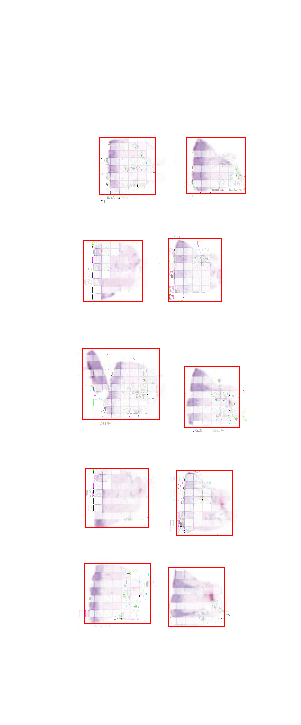

In [5]:
slide.get_thumbnail_with_boxes()

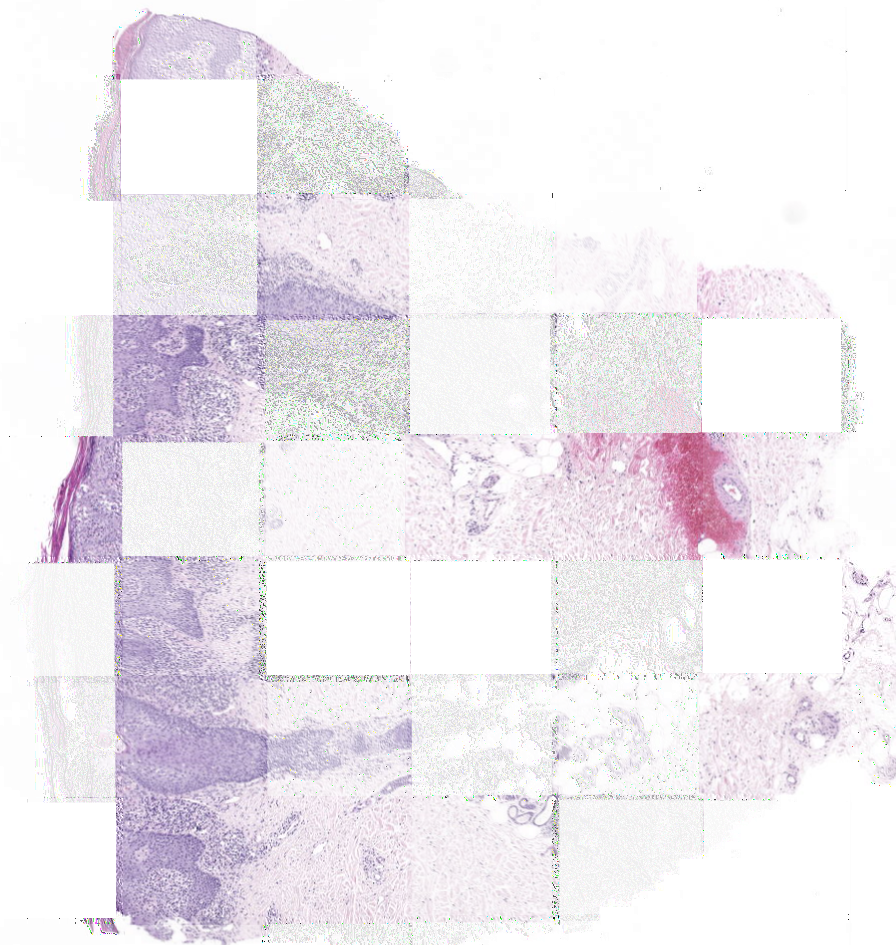

In [6]:
level = 4
region = slide.get_region(slide.boxes[level][-1], level)
region

## Let's import an annotation segmentation file of type .bmp

In [ ]:
# set max pixels to avoid warning 
Image.MAX_IMAGE_PIXELS = 100000000000

# WARNING:
# Adapt PIL.BmpImagePlugin.BmpImageFile._bitmap as follows: Comment out
# the following lines (that are supposed to help prevent DOS attacks):
# 
#          if file_info["width"] * file_info["height"] > 2 ** 31:
#              raise IOError("Unsupported BMP Size: (%dx%d)" % self.size)
# Got to external libraries on your project window in pycharm. Click command shift f to search
# the external libraries and search for BmpImagePlugin, this will be the file you have to change. 

path_to_segmentation_file = "/Users/jeremyscheurer/Code/data/labels.bmp"
annotation = Image.open("/Users/jeremyscheurer/Code/data/labels.bmp")
print("width and height", annotation.size)
annotation.thumbnail((50,50))
annotation.show()

# reload image to have original height and width 
annotation = Image.open("/Users/jeremyscheurer/Code/data/labels.bmp")

In [ ]:
# Now let's crop the image to the segmented sample and resize it so we can actually work with it
# Note the annotations were taken at the highest resolution, i.e. lowest level
np_annotation = np.array(annotation)
annotation_box = np.argwhere(np_annotation!=0)
annotation_box = annotation_box[:,[1,0]]
x,y,w,h = cv2.boundingRect(annotation_box)

In [13]:
roi = np_annotation[y:y+h, x:x+w]
print("width and height", roi.shape)
pillow_roi = np.fromarray(roi)
pillow_roi.thubmnail((100,100))
pillow_roi.show()

NameError: name 'np_annotation' is not defined